# 图像增广
## 什么是图像增广技术
图像增广（image augmentation）技术通过对训练图像做一系列随机改变，来产生相似但又不同的训练样本，从而扩大训练数据集的规模。图像增广的另一种解释是，随机改变训练样本可以降低模型对某些属性的依赖，从而提高模型的泛化能力。例如，我们可以对图像进行不同方式的裁剪，使感兴趣的物体出现在不同位置，从而减轻模型对物体出现位置的依赖性。我们也可以调整亮度、色彩等因素来降低模型对色彩的敏感度。可以说，在当年AlexNet的成功中，图像增广技术功不可没。

In [1]:
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image

import d2lzh_pytorch as d2l

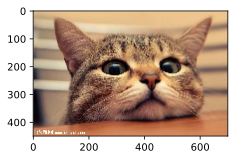

In [32]:
d2l.set_figsize()
img = Image.open('img\cat1.jpg')
d2l.plt.imshow(img)

In [33]:
# 绘图函数 show_image
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

## 翻转与裁剪

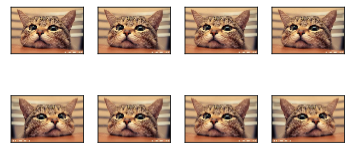

In [34]:
# 一半概率水平翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

上下翻转不如左右翻转通用。但是至少对于样例图像，上下翻转不会造成识别障碍。

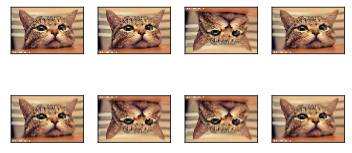

In [35]:
# 一半概率上下翻转
apply(img, torchvision.transforms.RandomVerticalFlip())

在下面的代码里，我们每次随机裁剪出一块面积为原面积10%∼100%的区域，且该区域的宽和高之比随机取自0.5∼2，然后再将该区域的宽和高分别缩放到200像素

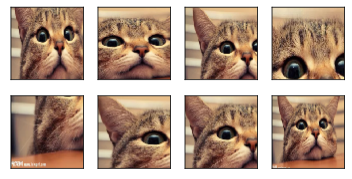

In [36]:
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

## 变化颜色
我们可以从4个方面改变图像的颜色：`亮度（brightness）`、`对比度（contrast）`、`饱和度（saturation）`和`色调（hue）`。在下面的例子里，我们将图像的亮度随机变化为原图亮度的$50\%（1−0.5）∼150\%（1+0.5）$。

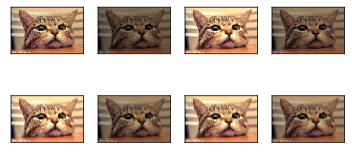

In [37]:
apply(img,torchvision.transforms.ColorJitter(brightness=0.5))

我们也可以随机变化图像的色调。

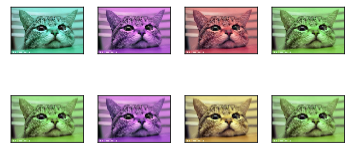

In [38]:
apply(img, torchvision.transforms.ColorJitter(hue=0.4))

类似地，我们也可以随机变化图像的对比度。

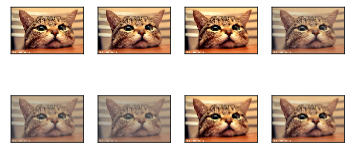

In [39]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

同时改变亮度、对比度、饱和度和色调

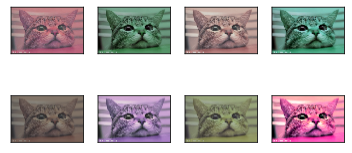

In [40]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

## 叠加多个图像增广方法

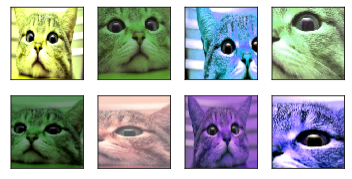

In [46]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),color_aug, shape_aug])# 先水平翻转，再改变颜色，再改变形状
apply(img, augs)

## 使用图像增广训练模型
下面我们来看一个将图像增广应用在实际训练中的例子。这里我们使用CIFAR-10数据集。

In [47]:
all_imges = torchvision.datasets.CIFAR10(train=True, root="~/Datasets/CIFAR", download=True)
# all_imges的每一个元素都是(image, label)
show_images([all_imges[i][0] for i in range(32)], 4, 8, scale=0.8);

0it [00:00, ?it/s]

  0%|                                                                  | 204800/170498071 [00:15<3:20:58, 14122.10it/s]

KeyboardInterrupt: 